In [1]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from retinaface import RetinaFace
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [22]:
dirPath = './Dataset/'
img_list = []
label = []

for file in os.listdir(dirPath) :
    Path = dirPath + file
    for f in  os.listdir(Path) :
        if os.path.isfile(os.path.join(Path, f)):
            img = cv2.imread(Path + '/'+ f )
            img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
            img = img / 255.0
            img_list.append(img)
            label.append(file)
            
train = np.asarray(img_list , dtype='float32')
# train = np.expand_dims(train , axis=-1)
target = np.asarray(label)

            
print(train.shape)
print(target.shape)

(5987, 128, 128, 3)
(5987,)


In [23]:
Label = LabelEncoder()
Label.fit(target)
target_label = Label.transform(target) #將標籤做0和1轉換
print(target_label.shape)

(5987,)


In [24]:
print('沒戴口罩:',target[0],':' , target_label[0])
print('有戴口罩:',target[5000],':' , target_label[5000]) 

沒戴口罩: without_mask : 1
有戴口罩: with_mask : 0


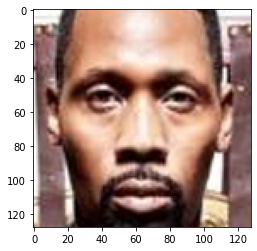

In [25]:
plt.imshow(train[0])
plt.show()

model[noraml quality] init ..
model success !
[{'x1': 2, 'y1': 3, 'x2': 122, 'y2': 125, 'left_eye': (22, 24), 'right_eye': (79, 29), 'nose': (35, 64), 'left_lip': (21, 91), 'right_lip': (60, 94)}]


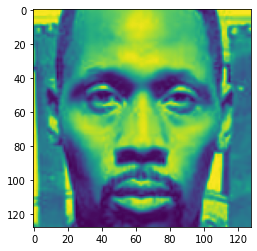

In [6]:
img = cv2.imread('./Dataset/with_mask/1041.png')
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
dec = RetinaFace(quality="noraml") #偵測器 可選數值為 normal and speed
detections = dec.predict(img) #將圖片給予偵測
print(detections) #印出臉框 眼睛鼻子
plt.imshow(train[0])
plt.show()

In [28]:
tf.compat.v1.reset_default_graph()
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(input_shape=(128,128,3) , filters=32 , kernel_size=(3 ,3) ,strides=(1,1) , padding='same'
                                , activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=(2 ,2) ,strides=(1,1) , padding='same', activation='relu'))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32 ,activation='relu' ))
model.add(tf.keras.layers.Dense(2 ,activation='softmax'))

model.summary()
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) , 
              loss = tf.keras.losses.SparseCategoricalCrossentropy() , 
             metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4128      
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                4194336   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 4,199,426
Trainable params: 4,199,426
Non-trainable params: 0
______________________________________________

In [29]:
history = model.fit(train , target_label , epochs=20 ,batch_size=70 , validation_split=0.3, verbose=2 )

Train on 4190 samples, validate on 1797 samples
Epoch 1/20
4190/4190 - 48s - loss: 0.4693 - accuracy: 0.8706 - val_loss: 0.3263 - val_accuracy: 0.8971
Epoch 2/20
4190/4190 - 48s - loss: 0.0931 - accuracy: 0.9740 - val_loss: 0.2998 - val_accuracy: 0.8993
Epoch 3/20
4190/4190 - 48s - loss: 0.0685 - accuracy: 0.9819 - val_loss: 0.2375 - val_accuracy: 0.9154
Epoch 4/20
4190/4190 - 48s - loss: 0.0515 - accuracy: 0.9859 - val_loss: 0.2854 - val_accuracy: 0.9143
Epoch 5/20
4190/4190 - 48s - loss: 0.0584 - accuracy: 0.9845 - val_loss: 0.1058 - val_accuracy: 0.9633
Epoch 6/20
4190/4190 - 48s - loss: 0.0461 - accuracy: 0.9869 - val_loss: 0.2463 - val_accuracy: 0.9282
Epoch 7/20
4190/4190 - 48s - loss: 0.0336 - accuracy: 0.9905 - val_loss: 0.1344 - val_accuracy: 0.9544
Epoch 8/20
4190/4190 - 48s - loss: 0.0260 - accuracy: 0.9928 - val_loss: 0.1546 - val_accuracy: 0.9516
Epoch 9/20
4190/4190 - 48s - loss: 0.0168 - accuracy: 0.9952 - val_loss: 0.1633 - val_accuracy: 0.9482
Epoch 10/20
4190/4190 - 4

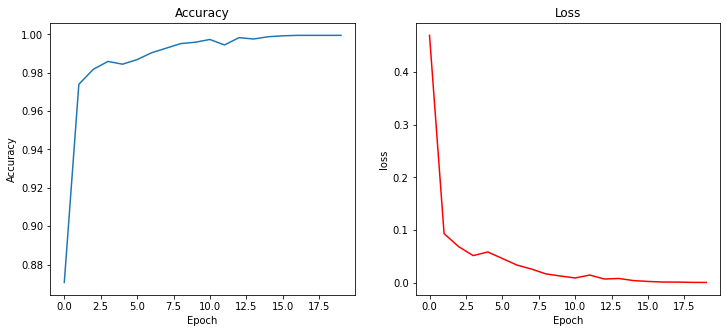

In [43]:
history.history
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Accuracy')
plt.plot(history.history['accuracy'] , label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.subplot(122)
plt.title('Loss')
plt.plot(history.history['loss'] , label='loss' , color='r')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

In [31]:
model.save('mask_model.h5')

In [16]:
model = tf.keras.models.load_model('mask_model.h5')
dec = RetinaFace(quality="noraml")

model[noraml quality] init ..
model success !


{1: 'No! Mask', 0: 'yes ! Mask'}
1
(1, 128, 128, 3)


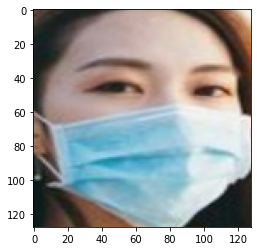

yes ! Mask


In [30]:
prdic = {target_label[0]:'No! Mask' , target_label[5000]:'yes ! Mask'}
print(prdic)
img = cv2.imread('./test/test1.jpg')
detections = dec.predict(img) #將圖片給予偵測
# print(detections) #印出臉框 眼睛鼻子
print(len(detections))
x1 = detections[0]['x1']
y1 = detections[0]['y1']
x2 = detections[0]['x2']
y2 = detections[0]['y2']
face = img[y1:y2 , x1:x2]
face = cv2.resize(face , (128 , 128))
img[0:128 , 0:128] = face
face = cv2.cvtColor(face , cv2.COLOR_BGR2RGB)
face = face / 255.0
face = np.asarray(face)
face = np.expand_dims(face , axis=0)
# face = np.expand_dims(face , axis=-1)
print(face.shape)
plt.imshow(face[0])
plt.show()

y_pred = model.predict(face)
result = np.argmax(y_pred)
print(prdic[result])